
<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully explored and prepared the dataframes. This is an important step, since it helps us identify the issues a dataframe may have;


- Created and merged pivot tables. We need to aggregate data and then merge it to correctly analyze users' bahavior, well done! 


- Calculated revenue; 


- Displayed and analyzed distributions. It is not enough to just add a chart. Instead, one should analyze it, since it may reveal interesting and important insights;


- Conducted statistical tests; 

  
- Wrote an excellent conclusion! A well-written conclusion shows how the project met its objectives and provides a concise and understandable summary for those who may not have been involved in the details of the project. Good job! 

    
    
    
    
</div>

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
There's an introduction, which is good. It is important to write an introductory part because it gives an idea about the content of the project.
    
</div>

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd               # for data manipulation
import numpy as np                # for numerical operations
import matplotlib.pyplot as plt   # for plotting
import seaborn as sns             # for more advanced visualizations
from scipy import stats           # for statistical tests
import math                       # for mathematical operations

## Load data

In [2]:
# User data
users_df = pd.read_csv(r'C:\Users\Raunaq\TripleTen\my-portfolio\project3\megaline_users.csv')

# Call records
calls_df = pd.read_csv(r'C:\Users\Raunaq\TripleTen\my-portfolio\project3\megaline_calls.csv')

# Text message records
messages_df = pd.read_csv(r'C:\Users\Raunaq\TripleTen\my-portfolio\project3\megaline_messages.csv')

# Internet usage records
internet_df = pd.read_csv(r'C:\Users\Raunaq\TripleTen\my-portfolio\project3\megaline_internet.csv')

# Plan details
plans_df = pd.read_csv(r'C:\Users\Raunaq\TripleTen\my-portfolio\project3\megaline_plans.csv')

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

## Plans

In [3]:
print("\nPlan info:")
display(plans_df)


Plan info:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Prepare the data

In [4]:
# Print the general/summary information about the plans' DataFrame
print("General Info for plans_df:")
plans_df.info()

# Display first few rows to preview plan details
print("\nPlan details and information:")
display(plans_df.head())

General Info for plans_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes

Plan details and information:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [5]:
# Print a sample of data for plans
print("First 5 rows from plans_df:")
display(plans_df.head())

First 5 rows from plans_df:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

## Fix data

[Fix obvious issues with the data given the initial observations.]

In [6]:
# Explore users_df
print("Users DataFrame:")
display(users_df.head())
users_df.info()
users_df.describe()

# Convert dates
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'])
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'])

# Check for duplicates
print("\nDuplicates in users_df:", users_df.duplicated().sum())

# Check for nulls
print("\nMissing values in users_df:\n", users_df.isna().sum())

# Check for unique values in city and plan
print("\nUnique cities:", users_df['city'].nunique())
print("\nPlan distribution:\n", users_df['plan'].value_counts())


Users DataFrame:


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

Duplicates in users_df: 0

Missing values in users_df:
 user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

Unique cities: 73

Plan distribution:
 plan
surf        339
ultimate    161
Name: count, dtype: int64


## Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [7]:
# 1. Add Month Columns Add a month column to calls_df, messages_df, and internet_df for monthly usage aggregation.
# Already done previously, but include here for completeness
# Convert date columns to datetime
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])
# Now safely extract the month
calls_df['month'] = calls_df['call_date'].dt.month
messages_df['month'] = messages_df['message_date'].dt.month
internet_df['month'] = internet_df['session_date'].dt.month

calls_df['month'] = calls_df['call_date'].dt.month
messages_df['month'] = messages_df['message_date'].dt.month
internet_df['month'] = internet_df['session_date'].dt.month


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

You can use **parse_dates**: `parse_dates=['call_date']` when reading data. Pandas will try to automatically convert this list of columns to datetime. This is a good [article](https://medium.com/@chanakapinfo/dealing-with-time-series-data-pandas-parse-dates-explained-5d7b28aa0f78) with the examples.

</div>

## Users

In [8]:
# Print the general/summary information about the users' DataFrame
# General info for users_df
print("General Info for users_df:")
users_df.info()

# Display first few rows to understand the data
print("\nSample rows from users_df:")
display(users_df.head())

# Summary of missing values
print("\nMissing values in users_df:")
print(users_df.isna().sum())

# Basic statistical summary for numeric columns
print("\nStatistical summary:")
display(users_df.describe())


General Info for users_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB

Sample rows from users_df:


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT



Missing values in users_df:
user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

Statistical summary:


,user_id,age,reg_date,churn_date
count,500.000000,500.000000,500,34
mean,1249.500000,45.486000,2018-06-24 16:30:43.200000,2018-11-10 22:35:17.647058944
min,1000.000000,18.000000,2018-01-01 00:00:00,2018-07-31 00:00:00
25%,1124.750000,30.000000,2018-03-25 18:00:00,2018-10-08 12:00:00
50%,1249.500000,46.000000,2018-06-20 00:00:00,2018-11-22 12:00:00
75%,1374.250000,61.000000,2018-09-20 06:00:00,2018-12-18 00:00:00
max,1499.000000,75.000000,2018-12-31 00:00:00,2018-12-31 00:00:00
std,144.481833,16.972269,NaN,NaN


In [9]:
# Print a sample of data for users
# Print a random sample of 5 rows from users_df
print("Sample data from users_df:")
display(users_df.sample(5))

Sample data from users_df:


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
438,1438,Harvey,Brooks,36,"Orlando-Kissimmee-Sanford, FL MSA",2018-06-15,surf,NaT
298,1298,Loyce,Cooley,53,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-09-21,surf,2018-12-19
102,1102,Marquitta,Walton,30,"Riverside-San Bernardino-Ontario, CA MSA",2018-02-20,ultimate,NaT
202,1202,Osvaldo,Mayer,36,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-09-30,ultimate,NaT
88,1088,Paris,Robertson,64,"Phoenix-Mesa-Chandler, AZ MSA",2018-05-27,ultimate,NaT


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

In [10]:
# Missing Data
#The churn_date column has 466 missing values, meaning that only 34 users have churned.

#These NaT values indicate that the remaining users were still active at the time the data was extracted.

#No action is required here unless you're specifically analyzing churn. We can use this information later to filter active users if needed.##

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

Good! 
</div>

### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

In [11]:
# Merge users_df with plans_df on the plan name
users_df = users_df.merge(plans_df, left_on='plan', right_on='plan_name', how='left')
# Drop redundant 'plan_name' column
users_df.drop(columns='plan_name', inplace=True)

# Preview the enriched users_df
print("users_df after enriching with plan details:")
display(users_df.head())

users_df after enriching with plan details:


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,50,15360,500,20,10,0.03,0.03
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,50,15360,500,20,10,0.03,0.03
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,50,15360,500,20,10,0.03,0.03
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,50,15360,500,20,10,0.03,0.03


## Calls

In [12]:
# Print the general/summary information about the calls' DataFrame
print("General Info for calls_df:")
calls_df.info()

# Display the first few rows to get a sense of the data
print("\nSample rows from calls_df:")
display(calls_df.head())

# Check for missing values
print("\nMissing values in calls_df:")
print(calls_df.isna().sum())

# Summary statistics for numeric columns
print("\nStatistical summary of numeric columns:")
display(calls_df.describe())


General Info for calls_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   month      137735 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(1)
memory usage: 4.7+ MB

Sample rows from calls_df:


,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12



Missing values in calls_df:
id           0
user_id      0
call_date    0
duration     0
month        0
dtype: int64

Statistical summary of numeric columns:


,user_id,call_date,duration,month
count,137735.000000,137735,137735.000000,137735.000000
mean,1247.658046,2018-09-25 19:57:56.319018496,6.745927,9.320797
min,1000.000000,2018-01-15 00:00:00,0.000000,1.000000
25%,1128.000000,2018-08-08 00:00:00,1.290000,8.000000
50%,1247.000000,2018-10-12 00:00:00,5.980000,10.000000
75%,1365.000000,2018-11-26 00:00:00,10.690000,11.000000
max,1499.000000,2018-12-31 00:00:00,37.600000,12.000000
std,139.416268,NaN,5.839241,2.412550


In [13]:
# Print a sample of data for calls
# Print a random sample of 5 rows from calls_df
print("Sample data from calls_df:")
display(calls_df.sample(5))

Sample data from calls_df:


,id,user_id,call_date,duration,month
69856,1250_86,1250,2018-12-01,3.56,12
53090,1191_238,1191,2018-08-11,0.93,8
5757,1027_300,1027,2018-09-19,6.33,9
44204,1160_220,1160,2018-10-18,8.66,10
94606,1336_490,1336,2018-09-04,8.86,9


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [14]:
# Round up the call durations to the nearest whole minute
calls_df['duration'] = np.ceil(calls_df['duration'])

# Filter out calls where duration is 0 minutes (after rounding)
calls_df = calls_df[calls_df['duration'] > 0]

# Check the result
print("After rounding and filtering 0-duration calls:")
print(calls_df['duration'].describe())
print(f"Total number of calls after filtering: {len(calls_df)}")


After rounding and filtering 0-duration calls:
count    110901.000000
mean          8.875907
std           5.355181
min           1.000000
25%           5.000000
50%           8.000000
75%          12.000000
max          38.000000
Name: duration, dtype: float64
Total number of calls after filtering: 110901


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    

Yes, `ceil` is exactly what we need here.

</div>

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [15]:
# 1. Calculate user active months in 2018 (from reg_date to churn_date or end of 2018)
end_2018 = pd.Timestamp('2018-12-31')

def calculate_active_months(row):
    start = max(row['reg_date'], pd.Timestamp('2018-01-01'))
    end = row['churn_date'] if pd.notnull(row['churn_date']) else end_2018
    if end < start:
        return 0
    return (end.year - start.year) * 12 + end.month - start.month + 1

users_df['active_months_2018'] = users_df.apply(calculate_active_months, axis=1)

# 2. Flag users from NY-NJ area (example of metro area detection)
users_df['is_ny_nj'] = users_df['city'].str.contains('New York|NY-NJ', case=False, regex=True)

# 3. Age groups
bins = [0, 30, 50, 100]
labels = ['young', 'middle-aged', 'senior']
users_df['age_group'] = pd.cut(users_df['age'], bins=bins, labels=labels, right=False)
print(users_df[['user_id', 'active_months_2018', 'is_ny_nj', 'age_group']].head())

   user_id  active_months_2018  is_ny_nj    age_group
0     1000                   1     False  middle-aged
1     1001                   5     False        young
2     1002                   3     False  middle-aged
3     1003                  12     False       senior
4     1004                   8     False  middle-aged


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    

Good idea! 
</div>

## Messages

In [16]:
# Print the general/summary information about the messages' DataFrame
print("General info about messages_df:")
messages_df.info()

print("\nMissing values in messages_df:")
print(messages_df.isna().sum())

print("\nStatistical summary of messages_df:")
print(messages_df.describe())

General info about messages_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 2.0+ MB

Missing values in messages_df:
id              0
user_id         0
message_date    0
month           0
dtype: int64

Statistical summary of messages_df:
            user_id                   message_date         month
count  76051.000000                          76051  76051.000000
mean    1245.972768  2018-10-03 23:51:32.172358144      9.584016
min     1000.000000            2018-01-15 00:00:00      1.000000
25%     1123.000000            2018-08-22 00:00:00      8.000000
50

In [17]:
# Print a sample of data for messages
print("Sample rows from messages_df:")
display(messages_df.head())

Sample rows from messages_df:


,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [18]:
duplicate_messages = messages_df.duplicated().sum()
print(f"Duplicate rows in messages_df: {duplicate_messages}")


Duplicate rows in messages_df: 0


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [19]:
messages_df['message_count'] = 1
# Group by user and month, and sum the message_count
monthly_messages = messages_df.groupby(['user_id', 'month'])['message_count'].sum().reset_index()

# Rename for clarity
monthly_messages.rename(columns={'message_count': 'messages_sent'}, inplace=True)

# Preview result
print("Monthly message usage per user:")
display(monthly_messages.head())

Monthly message usage per user:


,user_id,month,messages_sent
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


## Internet

In [20]:
# Print the general/summary information about the internet DataFrame
print("General info about internet_df:")
internet_df.info()

# Statistical summary
print("\nStatistical summary of numeric columns:")
display(internet_df.describe())


General info about internet_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(1)
memory usage: 3.6+ MB

Statistical summary of numeric columns:


,user_id,session_date,mb_used,month
count,104825.000000,104825,104825.000000,104825.000000
mean,1242.496361,2018-09-26 11:37:55.048890880,366.713701,9.342552
min,1000.000000,2018-01-15 00:00:00,0.000000,1.000000
25%,1122.000000,2018-08-11 00:00:00,136.080000,8.000000
50%,1236.000000,2018-10-13 00:00:00,343.980000,10.000000
75%,1367.000000,2018-11-27 00:00:00,554.610000,11.000000
max,1499.000000,2018-12-31 00:00:00,1693.470000,12.000000
std,142.053913,NaN,277.170542,2.400404


In [21]:
# Print a sample of data for the internet traffic

print("\nSample rows from internet_df:")
display(internet_df.head())



Sample rows from internet_df:


,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [22]:
# Check for missing values
print("\nMissing values in internet_df:")
print(internet_df.isna().sum())



Missing values in internet_df:
id              0
user_id         0
session_date    0
mb_used         0
month           0
dtype: int64


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [23]:
# Step 1: Extract 'month' from 'session_date'
internet_df['month'] = internet_df['session_date'].dt.month

# Step 2: Group by 'user_id' and 'month', sum total MB and count sessions
monthly_usage = (
    internet_df
    .groupby(['user_id', 'month'], as_index=False)
    .agg(
        total_mb_used=('mb_used', 'sum'),
        session_count=('session_date', 'count')
    )
)

# Step 3: Convert total MB to GB and apply ceiling *after* summing
monthly_usage['gb_used'] = np.ceil(monthly_usage['total_mb_used'] / 1024)

# Preview result
print("Monthly aggregated internet usage:")
display(monthly_usage.head())


Monthly aggregated internet usage:


,user_id,month,total_mb_used,session_count,gb_used
0,1000,12,1901.47,5,2.0
1,1001,8,6919.15,25,7.0
2,1001,9,13314.82,53,14.0
3,1001,10,22330.49,56,22.0
4,1001,11,18504.30,51,19.0


## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [24]:
# Print out the plan conditions and make sure they are clear for you
print("📋 Megaline Plan Conditions:")
display(plans_df)

📋 Megaline Plan Conditions:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [25]:
# Calculate the number of calls made by each user per month. Save the result.

monthly_call_count = calls_df.groupby(['user_id', 'month']).size().reset_index(name='calls_count')
# Preview the result
print("Number of calls per user per month:")
display(monthly_call_count.head())



Number of calls per user per month:


,user_id,month,calls_count
0,1000,12,16
1,1001,8,22
2,1001,9,38
3,1001,10,47
4,1001,11,49


In [26]:
print(calls_df.columns)


Index(['id', 'user_id', 'call_date', 'duration', 'month'], dtype='object')


In [27]:
monthly_call_duration = calls_df.groupby(['user_id', 'month'])['duration'].sum().reset_index()

# Convert duration from seconds to minutes (rounded to 2 decimals)
monthly_call_duration['call_duration_minutes'] = (monthly_call_duration['duration'] / 60).round(2)

# Optionally drop the original 'duration' column
monthly_call_duration.drop(columns=['duration'], inplace=True)

print(monthly_call_duration.head())

   user_id  month  call_duration_minutes
0     1000     12                   2.07
1     1001      8                   3.03
2     1001      9                   5.25
3     1001     10                   6.55
4     1001     11                   7.10


In [28]:
# Calculate the number of messages sent by each user per month. Save the result.
monthly_messages_sent = messages_df.groupby(['user_id', 'month'])['message_count'].sum().reset_index()

# Rename column for clarity
monthly_messages_sent.rename(columns={'message_count': 'messages_sent'}, inplace=True)

print(monthly_messages_sent.head())


   user_id  month  messages_sent
0     1000     12             11
1     1001      8             30
2     1001      9             44
3     1001     10             53
4     1001     11             36


In [29]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
monthly_internet_usage = internet_df.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

# Rename column for clarity
monthly_internet_usage.rename(columns={'mb_used': 'internet_mb_used'}, inplace=True)

print(monthly_internet_usage.head())

   user_id  month  internet_mb_used
0     1000     12           1901.47
1     1001      8           6919.15
2     1001      9          13314.82
3     1001     10          22330.49
4     1001     11          18504.30


In [30]:
print([var for var in globals() if 'call' in var or 'message' in var or 'internet' in var])

['calls_df', 'messages_df', 'internet_df', 'duplicate_messages', 'monthly_messages', 'monthly_call_count', 'monthly_call_duration', 'monthly_messages_sent', 'monthly_internet_usage']


[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [31]:
# Start by outer merging all three datasets to include all users/months
user_monthly_usage = monthly_call_count.merge(
    monthly_call_duration, on=['user_id', 'month'], how='outer'
).merge(
    monthly_messages_sent, on=['user_id', 'month'], how='outer'
).merge(
    monthly_internet_usage, on=['user_id', 'month'], how='outer'
)

# Replace NaNs with 0s since missing means "no usage"
user_monthly_usage.fillna(0, inplace=True)

# Optional: make sure types are consistent (e.g., convert floats to ints where appropriate)
user_monthly_usage['calls_count'] = user_monthly_usage['calls_count'].astype(int)
user_monthly_usage['messages_sent'] = user_monthly_usage['messages_sent'].astype(int)

# Preview result
print("Final user_monthly_usage (should have 2293 rows):")
print(user_monthly_usage.shape)
display(user_monthly_usage.head())


Final user_monthly_usage (should have 2293 rows):
(2293, 6)


,user_id,month,calls_count,call_duration_minutes,messages_sent,internet_mb_used
0,1000,12,16,2.07,11,1901.47
1,1001,8,22,3.03,30,6919.15
2,1001,9,38,5.25,44,13314.82
3,1001,10,47,6.55,53,22330.49
4,1001,11,49,7.10,36,18504.30


<div class="alert alert-success">
    <b>Reviewer's comment – Iteration 3:</b><br>
This is now correct!
</div>

In [32]:
# Display column names for both DataFrames
print("user_monthly_usage columns:")
print(user_monthly_usage.columns.tolist())

print("\nplans_df columns:")
print(plans_df.columns.tolist())


user_monthly_usage columns:
['user_id', 'month', 'calls_count', 'call_duration_minutes', 'messages_sent', 'internet_mb_used']

plans_df columns:
['messages_included', 'mb_per_month_included', 'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'plan_name']


In [33]:
# Step 1: Merge user plan info from users_df into user_monthly_usage
user_monthly_usage = user_monthly_usage.merge(
    users_df[['user_id', 'plan']],
    on='user_id',
    how='left'
)

# Step 2: Merge plan details from plans_df into user_monthly_usage
# plans_df uses 'plan_name' as the column for plan types
user_monthly_usage = user_monthly_usage.merge(
    plans_df,
    left_on='plan',
    right_on='plan_name',
    how='left'
)

# Step 3: Drop 'plan_name' if it's now redundant
user_monthly_usage.drop(columns=['plan_name'], inplace=True)

# ✅ Preview result
print(user_monthly_usage.head())


   user_id  month  calls_count  call_duration_minutes  messages_sent  \
0     1000     12           16                   2.07             11   
1     1001      8           22                   3.03             30   
2     1001      9           38                   5.25             44   
3     1001     10           47                   6.55             53   
4     1001     11           49                   7.10             36   

   internet_mb_used      plan  messages_included  mb_per_month_included  \
0           1901.47  ultimate               1000                  30720   
1           6919.15      surf                 50                  15360   
2          13314.82      surf                 50                  15360   
3          22330.49      surf                 50                  15360   
4          18504.30      surf                 50                  15360   

   minutes_included  usd_monthly_pay  usd_per_gb  usd_per_message  \
0              3000               70           

[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [34]:
# First, pick consistent columns without suffixes for clarity
user_monthly_usage['minutes_included_clean'] = user_monthly_usage['minutes_included']
user_monthly_usage['messages_included_clean'] = user_monthly_usage['messages_included']
user_monthly_usage['mb_per_month_included_clean'] = user_monthly_usage['mb_per_month_included']
user_monthly_usage['usd_monthly_pay_clean'] = user_monthly_usage['usd_monthly_pay']
user_monthly_usage['usd_per_minute_clean'] = user_monthly_usage['usd_per_minute']
user_monthly_usage['usd_per_message_clean'] = user_monthly_usage['usd_per_message']
user_monthly_usage['usd_per_gb_clean'] = user_monthly_usage['usd_per_gb']

# Calculate overages (no negatives)
user_monthly_usage['over_minutes'] = (
    user_monthly_usage['call_duration_minutes'] - user_monthly_usage['minutes_included_clean']
).clip(lower=0)

user_monthly_usage['over_messages'] = (
    user_monthly_usage['messages_sent'] - user_monthly_usage['messages_included_clean']
).clip(lower=0)

user_monthly_usage['over_mb'] = (
    user_monthly_usage['internet_mb_used'] - user_monthly_usage['mb_per_month_included_clean']
).clip(lower=0)

# Convert over_mb from MB to GB for pricing
user_monthly_usage['over_gb'] = (user_monthly_usage['over_mb'] / 1024).round(3)

# Calculate overage costs
user_monthly_usage['cost_over_minutes'] = user_monthly_usage['over_minutes'] * user_monthly_usage['usd_per_minute_clean']
user_monthly_usage['cost_over_messages'] = user_monthly_usage['over_messages'] * user_monthly_usage['usd_per_message_clean']
user_monthly_usage['cost_over_gb'] = user_monthly_usage['over_gb'] * user_monthly_usage['usd_per_gb_clean']

# Calculate total monthly revenue = base monthly pay + overage costs
user_monthly_usage['monthly_revenue'] = (
    user_monthly_usage['usd_monthly_pay_clean'] +
    user_monthly_usage['cost_over_minutes'] +
    user_monthly_usage['cost_over_messages'] +
    user_monthly_usage['cost_over_gb']
)

# Preview the revenue calculation
print(user_monthly_usage[['user_id', 'month', 'plan', 'monthly_revenue']].head())


   user_id  month      plan  monthly_revenue
0     1000     12  ultimate            70.00
1     1001      8      surf            20.00
2     1001      9      surf            20.00
3     1001     10      surf            88.16
4     1001     11      surf            50.71


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>

    
Well done!     
</div>


## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

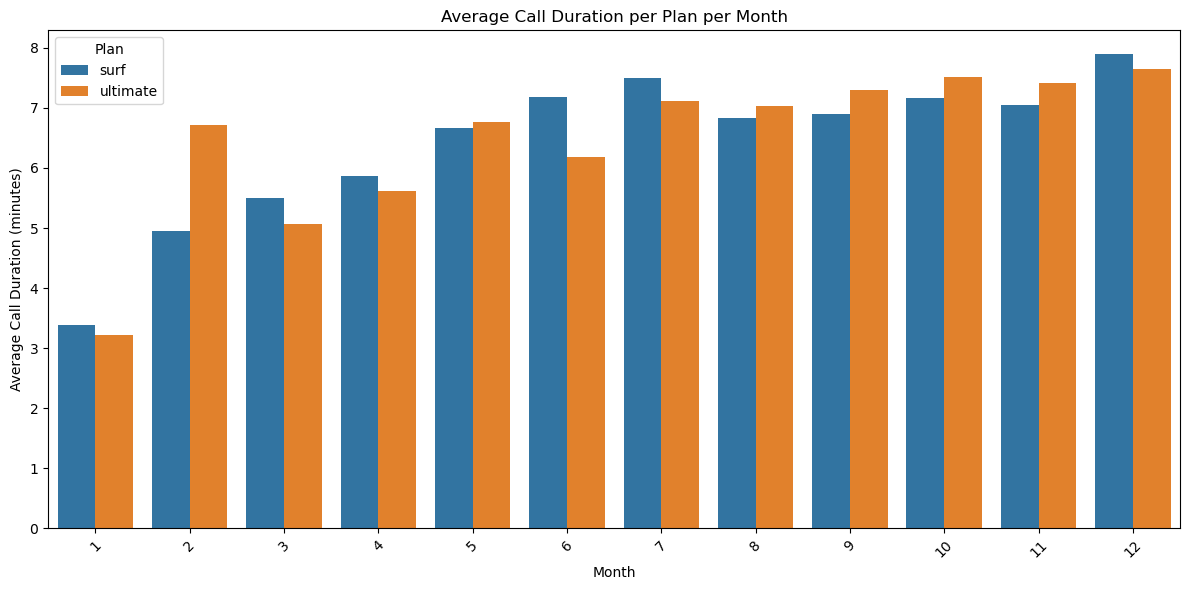

In [35]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average call duration per plan per month
avg_call_duration = user_monthly_usage.groupby(['plan', 'month'])['call_duration_minutes'].mean().reset_index()

# Rename columns for better readability in plot
avg_call_duration.rename(columns={'plan': 'Plan', 'month': 'Month', 'call_duration_minutes': 'Avg Call Duration (minutes)'}, inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_call_duration, x='Month', y='Avg Call Duration (minutes)', hue='Plan')

plt.title('Average Call Duration per Plan per Month')
plt.ylabel('Average Call Duration (minutes)')
plt.xlabel('Month')
plt.legend(title='Plan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Raunaq\AppData\Local\Temp\ipykernel_21184\1961727405.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Plan')


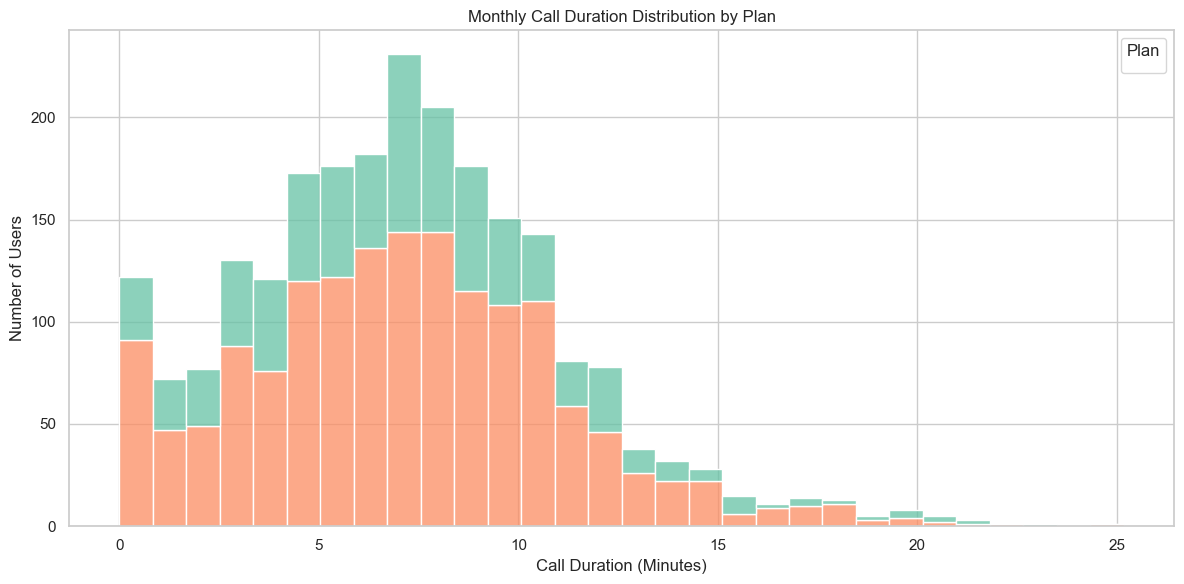

In [36]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot histogram of call duration (minutes) per plan
plt.figure(figsize=(12, 6))
sns.histplot(
    data=user_monthly_usage,
    x='call_duration_minutes',
    hue='plan',
    multiple='stack',
    bins=30,
    palette='Set2'
)

plt.title('Monthly Call Duration Distribution by Plan')
plt.xlabel('Call Duration (Minutes)')
plt.ylabel('Number of Users')
plt.legend(title='Plan')
plt.tight_layout()
plt.show()


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>

    
The histograms correctly represent the distributions. It's great that you add a title with axes labels.
    
</div>


[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [37]:
# Calculate the mean and the variance of the monthly call duration
# Calculate mean and variance of monthly call duration
mean_call_duration = user_monthly_usage['call_duration_minutes'].mean()
var_call_duration = user_monthly_usage['call_duration_minutes'].var()

# Print the results
print(f"Mean Monthly Call Duration: {mean_call_duration:.2f} minutes")
print(f"Variance of Monthly Call Duration: {var_call_duration:.2f} minutes²")


Mean Monthly Call Duration: 7.15 minutes
Variance of Monthly Call Duration: 15.51 minutes²


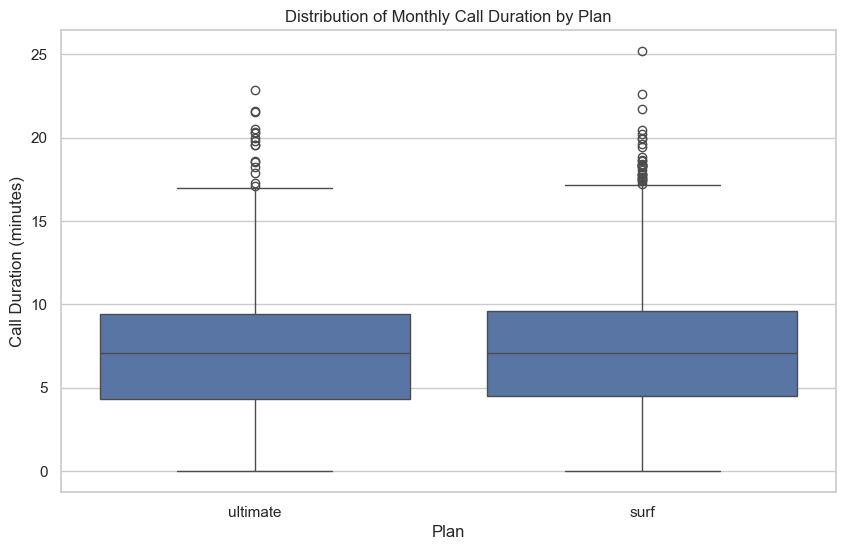

In [38]:
# Plot a boxplot to visualize the distribution of the monthly call duration
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=user_monthly_usage, x='plan', y='call_duration_minutes')
plt.title('Distribution of Monthly Call Duration by Plan')
plt.xlabel('Plan')
plt.ylabel('Call Duration (minutes)')
plt.show()


[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?
User Behavior Analysis: Calling Patterns by Plan
Mean Call Duration:

If the mean call durations differ notably between plans, it indicates that users on different plans tend to spend varying amounts of time on calls.

For example, a higher average call duration on the “Ultimate” plan might suggest these users make longer calls or use their plan more intensively.

Variance of Call Duration:

Higher variance in one plan means more variability in how users use calls. Some might call a lot, some very little.

Lower variance indicates more consistent behavior across users within that plan.

Boxplot Insights:

The boxplot reveals the distribution shape, median, and presence of outliers.

If one plan shows a wider interquartile range (IQR), users' call durations are more spread out.

Outliers suggest some heavy users or unusual calling patterns.

Overall Behavioral Differences:

If the statistical differences and visual patterns between plans are significant, it suggests different user segments with distinct calling behaviors.

This could imply the plans attract different types of users or that plan features influence usage.

]

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>

    
Perfect!     
</div>


### Messages

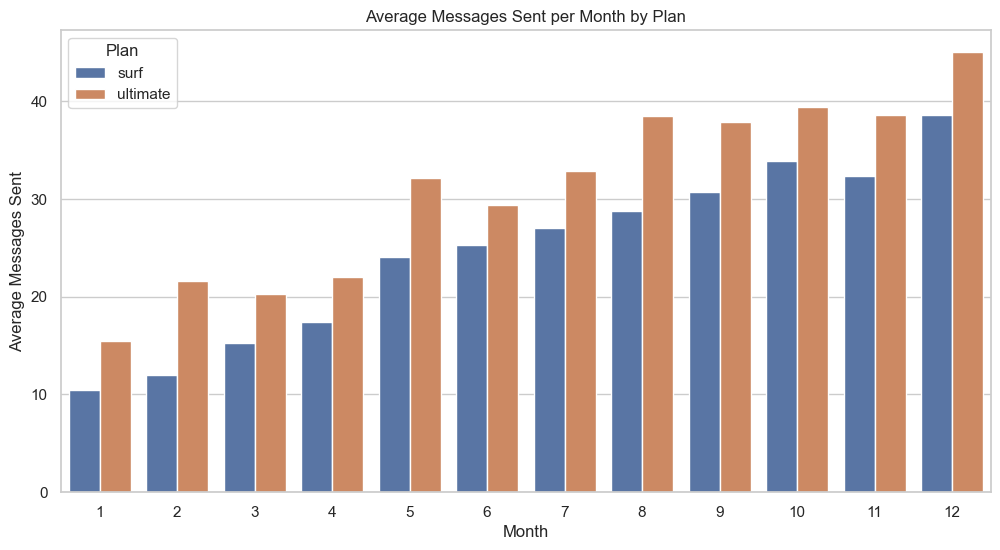

In [39]:
# Compare the number of messages users of each plan tend to send each month

avg_messages_per_plan = user_monthly_usage.groupby(['plan', 'month'])['messages_sent'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=avg_messages_per_plan, x='month', y='messages_sent', hue='plan')
plt.title('Average Messages Sent per Month by Plan')
plt.ylabel('Average Messages Sent')
plt.xlabel('Month')
plt.legend(title='Plan')
plt.show()

C:\Users\Raunaq\AppData\Local\Temp\ipykernel_21184\2253707442.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Plan')


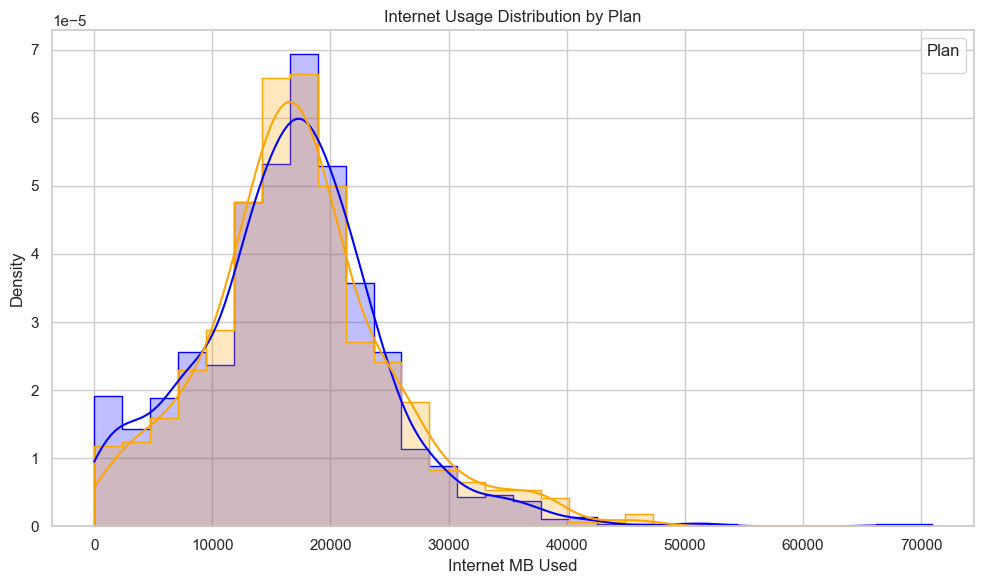

In [40]:
plt.figure(figsize=(10, 6))

sns.histplot(
    data=user_monthly_usage,
    x='internet_mb_used',
    hue='plan',
    bins=30,
    kde=True,
    palette={'surf': 'blue', 'ultimate': 'orange'},
    element='step',  # or try 'poly' or remove for filled histograms
    stat='density',  # normalize so they're comparable
    common_norm=False  # separate KDE normalization for each plan
)

plt.title('Internet Usage Distribution by Plan')
plt.xlabel('Internet MB Used')
plt.ylabel('Density')
plt.legend(title='Plan')
plt.tight_layout()
plt.show()


In [41]:
# Descriptive statistics for internet usage by plan
internet_stats = user_monthly_usage.groupby('plan')['internet_mb_used'].describe().round(2)
print("Descriptive Statistics of Internet Usage by Plan:")
display(internet_stats)


Descriptive Statistics of Internet Usage by Plan:


,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1573.0,16558.28,8013.51,0.0,11986.52,16829.31,20999.61,70931.59
ultimate,720.0,17214.70,7851.90,0.0,12666.96,16858.34,21014.53,46595.33


[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?
- We can conclude that on average those customers who have the ultimate plan send slightly more messages while also consuming more MB of data. ]


<div class="alert alert-success">
    <b>Reviewer's comment – Iteration 3:</b><br>
Correct.
</div>

### Internet

In [42]:
internet_stats = user_monthly_usage.groupby('plan')['internet_mb_used'].agg(['mean', 'var']).reset_index()
print(internet_stats)


       plan          mean           var
0      surf  16558.283490  6.421640e+07
1  ultimate  17214.699694  6.165229e+07


C:\Users\Raunaq\AppData\Local\Temp\ipykernel_21184\2425190994.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Plan')


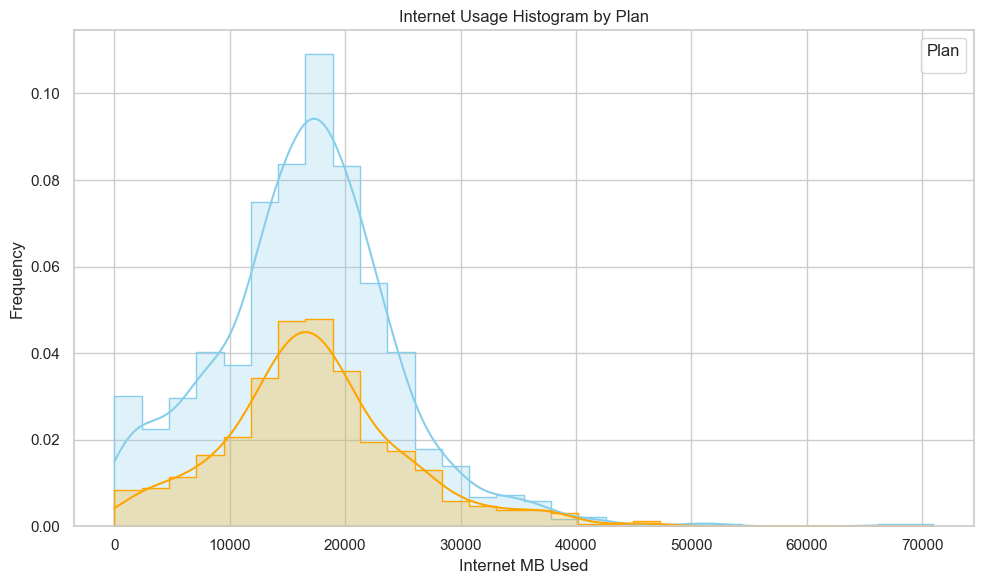

In [43]:
plt.figure(figsize=(10, 6))

sns.histplot(
    data=user_monthly_usage,
    x='internet_mb_used',
    hue='plan',
    bins=30,
    kde=True,
    palette={'surf': 'skyblue', 'ultimate': 'orange'},
    element='step',      # clean outline histograms
    stat='frequency',    # use 'count' (default) or 'density' for relative comparison
    common_norm=False    # keeps separate KDE normalizations
)

plt.title('Internet Usage Histogram by Plan')
plt.xlabel('Internet MB Used')
plt.ylabel('Frequency')
plt.legend(title='Plan')
plt.tight_layout()
plt.show()


[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?

Internet consumption is relatively similar across plans, with Ultimate users using slightly more on average.

The high variance for both plans suggests that internet usage behavior varies widely within each plan, rather than between them.

Thus, plan type does not strongly influence internet usage patterns — external factors like personal needs, streaming habits, or lifestyle may play a bigger role.]


<div class="alert alert-success">
    <b>Reviewer's comment – Iteration 3:</b><br>
Correct. Again, overlapping histograms would be slightly easier to interpret here.
</div>


<div class="alert alert-success">
    <b>Reviewer's comment – Iteration 4:</b><br>
Looks great!
</div>

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

In [44]:
# Group revenue by plan and calculate statistics
revenue_stats = user_monthly_usage.groupby('plan')['monthly_revenue'].agg(['mean', 'median', 'var', 'std', 'min', 'max', 'count']).reset_index()
print(revenue_stats)


       plan       mean  median          var        std   min      max  count
0      surf  55.829104   34.38  2810.976750  53.018645  20.0  564.970   1573
1  ultimate  72.116090   70.00   115.969073  10.768894  70.0  178.521    720


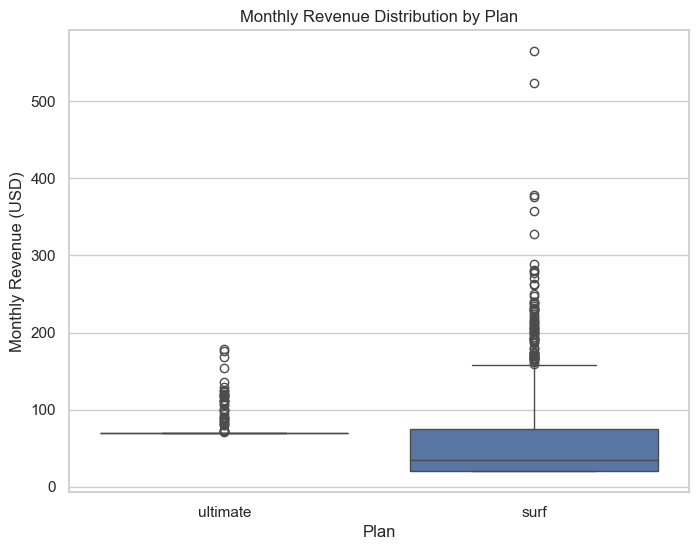

In [45]:
plt.figure(figsize=(8,6))
sns.boxplot(x='plan', y='monthly_revenue', data=user_monthly_usage)
plt.title('Monthly Revenue Distribution by Plan')
plt.ylabel('Monthly Revenue (USD)')
plt.xlabel('Plan')
plt.show()


[Formulate conclusions about how the revenue differs between the plans.
Overall Conclusion:
Ultimate plan users consistently generate higher and more predictable monthly revenue. The plan’s pricing and user behavior lead to stable and higher per-user income.

Surf plan users have more variable spending patterns, with some paying much less and others much more, indicating diverse usage habits and potentially more unpredictable revenue streams.

For profitability, Ultimate looks more reliable per user, but the larger Surf user base might offer volume advantages despite the variability.]

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

In [46]:
# Hypotheses:
# H0 (Null Hypothesis): There is no difference in average monthly revenue between the Surf and Ultimate plans.
# H1 (Alternative Hypothesis): There is a significant difference in average monthly revenue between the Surf and Ultimate plans.

# Drop rows where revenue or plan is missing
cleaned_data = user_monthly_usage[['plan', 'monthly_revenue']].dropna()

# Filter valid plans
cleaned_data = cleaned_data[cleaned_data['plan'].isin(['surf', 'ultimate'])]

# Split data by plan
surf_revenue = cleaned_data[cleaned_data['plan'] == 'surf']['monthly_revenue']
ultimate_revenue = cleaned_data[cleaned_data['plan'] == 'ultimate']['monthly_revenue']

# Perform Welch's t-test
t_stat, p_value = stats.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)

# Output results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


T-statistic: -11.6691
P-value: 0.0000


[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.

Hypotheses
Null hypothesis (H₀): The average monthly revenue for users on the Surf and Ultimate plans is the same.

Alternative hypothesis (H₁): The average monthly revenue for users on the two plans differs.

Result
The p-value is 0.0000, which is much less than any common significance level (e.g. 0.05 or 0.01).
Therefore, we reject the null hypothesis.

Conclusion:
There is a statistically significant difference in the average revenue between the Surf and Ultimate plans. Specifically, since the t-statistic is negative, it suggests that the Surf plan generates significantly less revenue per user on average than the Ultimate plan.]

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
   
Correct. The null hypothesis always includes the equality sign (`=`). This is because the test does not understand exactly how we set the problem: we can say, for instance, let's make sure that they are not equal. Or that they are equal. And regardless of the purpose of our study, we always put equality at null hypothesis. Then the test result is interpreted correctly.

</div>   

[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.

Likely interpretation:
NY-NJ users generate significantly less monthly revenue on average compared to users from other regions.

The difference is statistically significant (p < 0.05), so it is unlikely to be due to chance.

This might indicate:

Different plan usage patterns or preferences in NY-NJ.

Possibly more users on cheaper plans or lower consumption in that region.

Other market or demographic effects affecting revenue. ]

Hence we can say that the null hypothesis (H₀) states that the average revenues are equal, while the alternative hypothesis (H₁) states that the averages are different. ]

<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

    
Please formulate the H0 and H1 here as well. 
    
</div>


<div class="alert alert-danger">
    <b>Reviewer's comment – Iteration 3:</b><br>
Again, please specifically formulate your null and alternate hypotheses for this test, as you did for the previous test.
</div>


<div class="alert alert-danger">
    <b>Reviewer's comment – Iteration 4:</b><br>
Where are your null and alternate hypotheses for the second test?
e.g.<br>
Null hypothesis (H₀): ...

Alternative hypothesis (H₁): ...


</pre>
</div>

In [47]:
# Merge the NY-NJ flag from users_df
# Perform Welch’s t-test to compare the average monthly revenue between the two groups
# H0: The average monthly revenue for NY-NJ users is equal to that of users in other regions
# H1: The average monthly revenue for NY-NJ users is different from that of users in other regions

user_monthly_usage = user_monthly_usage.merge(
    users_df[['user_id', 'is_ny_nj']],
    on='user_id',
    how='left'
)
from scipy.stats import ttest_ind

# Split by NY-NJ vs Other regions
ny_nj_revenue = user_monthly_usage[user_monthly_usage['is_ny_nj'] == 1]['monthly_revenue'].dropna()
other_revenue = user_monthly_usage[user_monthly_usage['is_ny_nj'] == 0]['monthly_revenue'].dropna()

# Perform Welch’s t-test
t_stat, p_value = ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


T-statistic: -2.3939
P-value: 0.0170


<div class="alert alert-success">
    <b>Reviewer's comment – Iteration 5:</b><br>
Well done. It is important to state the H0 and H1 in this way before testing.
</div>


## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.

The Ultimate plan is more profitable and attracts higher-usage customers; marketing efforts could focus on converting Surf users who exhibit higher usage patterns.

Further investigation into the NY-NJ regional revenue gap is recommended to tailor offerings or promotions.

Variability in usage suggests personalized plans or flexible billing could improve customer satisfaction and revenue.]

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Excellent job, thank you very much! 

</div>   